In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
ruta_input="C:/Users/Omar/Desktop/Omar/Temas data science/Bases/Calidad de vinos/Input"
ruta_output="C:/Users/Omar/Desktop/Omar/Temas data science/Bases/Calidad de vinos/Output"

In [3]:
base_wine_red = pd.read_csv(os.path.join(ruta_input,"winequality-red.csv"),sep=";")
base_wine_red_orig = base_wine_red.copy()
base_ejemplo=pd.read_csv(os.path.join(ruta_input,'base_ejemplo.csv'))

In [4]:
base_wine_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


Graficando un solo histograma

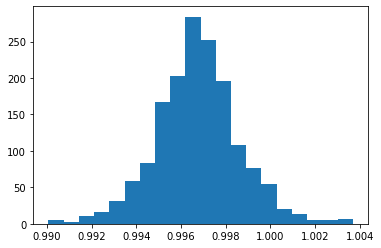

In [5]:
plt.hist(base_wine_red['density'],bins=20)
plt.show()

Graficando muchos histogramas

https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

https://www.programiz.com/python-programming/methods/built-in/zip

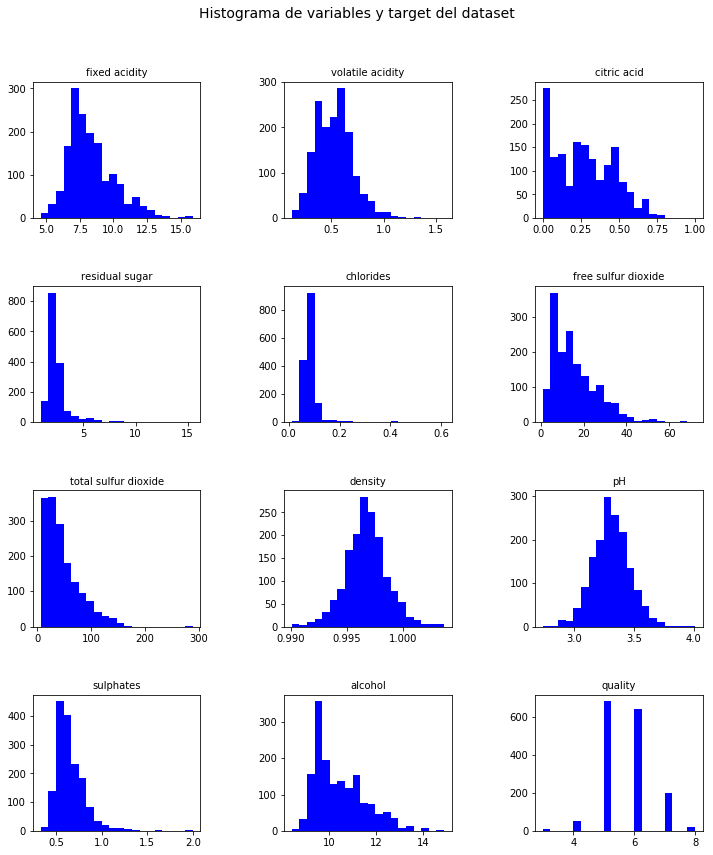

In [6]:
fig, axs = plt.subplots(4, 3,figsize=(12,13))
plt.suptitle('Histograma de variables y target del dataset', fontsize=14)
var=base_wine_red.columns.to_list() 
axs = axs.ravel()

for k,i in zip(var,range(0,12)):
    axs[i].hist(base_wine_red[k],color='blue', bins=20)
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)    

Grafico de barras

   quality  count
0        3     10
1        4     53
2        5    681
3        6    638
4        7    199
5        8     18


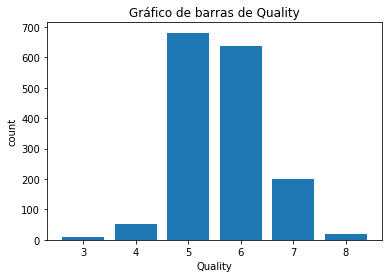

In [7]:
base_barras=base_wine_red.pivot_table(index='quality', aggfunc={'quality':'count'}).rename(columns={'quality':'count'})
base_barras.reset_index(inplace=True)
print(base_barras)
plt.bar(base_barras['quality'],base_barras['count'])
plt.title("Gráfico de barras de Quality", fontsize=12)
plt.xlabel("Quality")
plt.ylabel("count")
plt.show()

   quality  count
2        5    681
3        6    638
4        7    199
1        4     53
5        8     18
0        3     10


Text(0, 0.5, 'count')

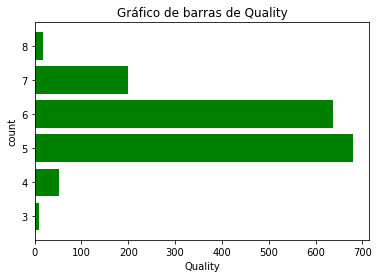

In [8]:
base_barras_2=base_barras.copy()
base_barras_2.sort_values(by=['count'],ascending=False,inplace=True)
print(base_barras_2)
plt.barh(base_barras_2['quality'],base_barras_2['count'], color='green')
plt.title("Gráfico de barras de Quality", fontsize=12)
plt.xlabel("Quality")
plt.ylabel("count")

**Pie**

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

Text(0.5, 1.0, 'Pie de Quality')

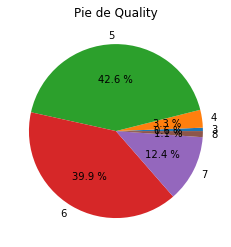

In [9]:
base_barras_3=base_barras.copy()
#elementos=base_barras_3.columns.to_list()
plt.pie(base_barras_3['count'],labels=base_barras_3['quality'],autopct="%0.1f %%")
plt.title("Pie de Quality")

**Gráfico de dispersión**

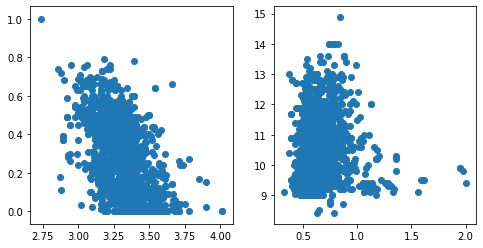

In [10]:
fig, axs = plt.subplots(1, 2,figsize=(8,4))
axs[0].scatter(base_wine_red.pH, base_wine_red['citric acid'])
axs[1].scatter(base_wine_red['sulphates'], base_wine_red['alcohol'])

**boxplot**

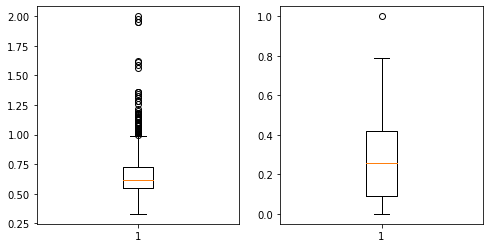

In [11]:
fig, axs = plt.subplots(1, 2,figsize=(8,4))
axs[0].boxplot(base_wine_red.sulphates)
axs[1].boxplot(base_wine_red['citric acid'])
plt.show()

**Mas gráficos**

Diagrama de violín

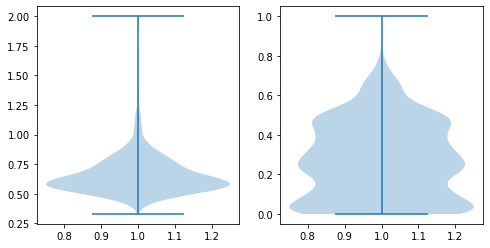

In [12]:
fig, axs = plt.subplots(1, 2,figsize=(8,4))
axs[0].violinplot(base_wine_red.sulphates)
axs[1].violinplot(base_wine_red['citric acid'])
plt.show()

#### ¿Qué análisis podemos realizar con los gráficos?

Con un análisis rápido se puede ver la normalidad de una variable

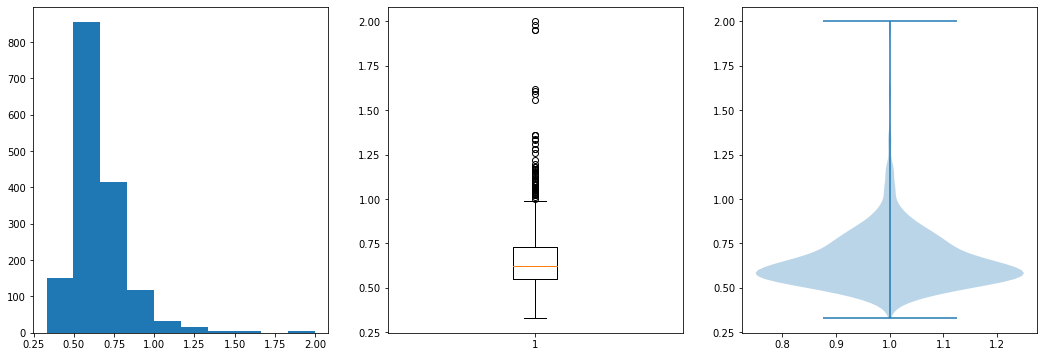

In [13]:
fig, axs = plt.subplots(1, 3,figsize=(18,6))

axs[0].hist(base_wine_red.sulphates)
axs[1].boxplot(base_wine_red.sulphates)
axs[2].violinplot(base_wine_red.sulphates)
plt.show()

Con un análisis más preciso

https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html

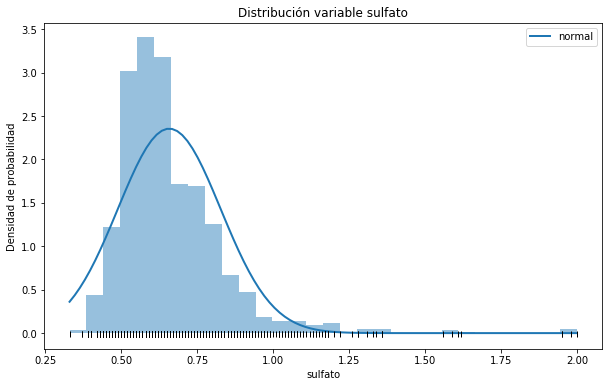

In [14]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(base_wine_red.sulphates)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(base_wine_red.sulphates), max(base_wine_red.sulphates), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=base_wine_red.sulphates, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(base_wine_red.sulphates, np.full_like(base_wine_red.sulphates, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable sulfato')
ax.set_xlabel('sulfato')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

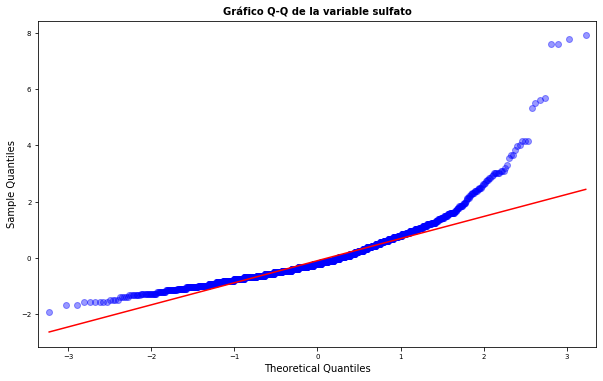

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sm.qqplot(
    base_wine_red.sulphates,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la variable sulfato', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Mediante un análisis más robusto

In [16]:
# D'Agostino's K-squared test
# ==============================================================================

### H0: la variable se distribuye normalmente.
### Si p valor<0.05 hay evidencia suficiente no aceptar la hipótesis nula.

k2, p_value = stats.normaltest(base_wine_red.sulphates)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 906.8944479227036, p-value = 1.1759065222978855e-197


## Personalizando gráficos 

Agregando linea que representa la mediana y comentario del valor de la mediana.

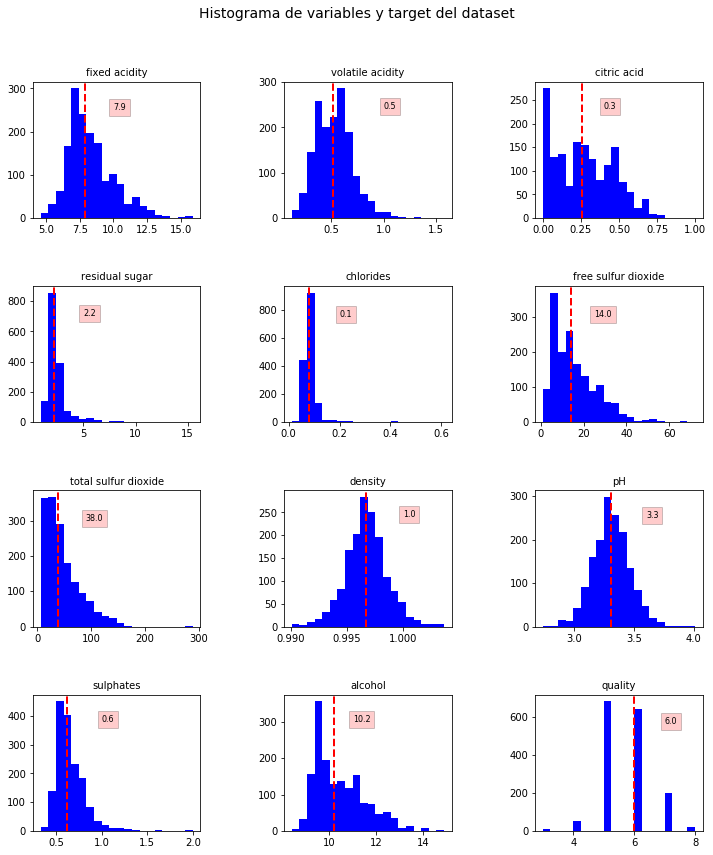

In [17]:
fig, axs = plt.subplots(4, 3,figsize=(12,13))
plt.suptitle('Histograma de variables y target del dataset', fontsize=14)
var=base_wine_red.columns.to_list() 
# comentario
# eje x: 
x=[10,1,0.4,5,0.2,25,90,1,3.6,1,11,7]
# eje y: 
y=[250,240,230,700,750,300,300,240,250,380,300,560]

axs = axs.ravel()

for k,i in zip(var,range(0,12)):
    axs[i].hist(base_wine_red[k],color='blue', bins=20)
    axs[i].axvline(base_wine_red[k].median(), color='r', linestyle='dashed', linewidth=2)
    axs[i].text(x[i],y[i],np.round(base_wine_red[k].median(),1),fontsize=8,bbox=dict(facecolor='red', alpha=0.2))
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)    

**Gráfico con doble eje Y**

In [18]:
base_ejemplo.drop(['temporada','finca_2','finca_ciclo'],axis=1,inplace=True)
base_ejemplo

,finca,temporada_de_ciclo,FCA_acum,costo libra,crec_lineal(g/sem),semanas_ciclo
0,Finca_1,calor,1.61,1.29,1.66,15
1,Finca_1,frio,1.58,1.70,1.89,12
2,Finca_2,calor,1.40,1.40,1.74,12
3,Finca_2,frio,1.41,1.44,1.53,14
4,Finca_3,calor,1.47,1.58,1.53,14
5,Finca_3,frio,1.42,1.56,1.45,14


In [19]:
base_ejemplo['finca_ciclo']=base_ejemplo['finca']+"_"+base_ejemplo['temporada_de_ciclo']
#Para mantener orden separo los campos a gráficar, se puede evitar este paso
eje_x=base_ejemplo['finca_ciclo']
eje_y1=base_ejemplo['semanas_ciclo']
eje_y2=base_ejemplo['FCA_acum']
eje_y3=base_ejemplo['costo libra']
eje_y4=base_ejemplo['crec_lineal(g/sem)']

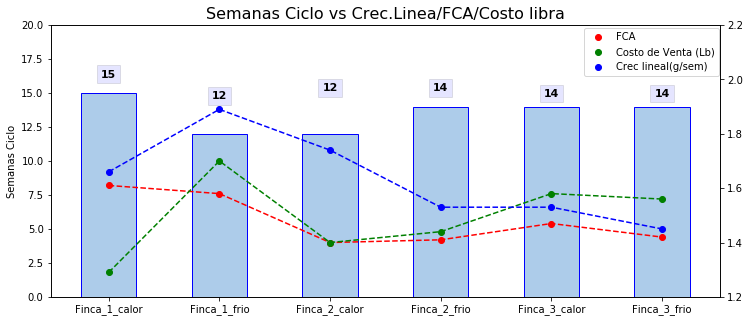

In [20]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.bar(eje_x,eje_y1,width=0.5,align='center',color=(0.2, 0.5, 0.8, 0.4),  edgecolor='blue')
ax1.set_title("Semanas Ciclo vs Crec.Linea/FCA/Costo libra", fontsize=16)
ax1.set_ylabel('Semanas Ciclo')
ax1.set_ylim(0,20)

#twinx: crea el segundo axis
ax2 = ax1.twinx()
ax2.plot(eje_x, eje_y2,color='red', ls='--',marker='o')
ax2.set_ylim(1.2,2.2)

ax3 = ax1.twinx()
ax3.plot(eje_x, eje_y3,color='green', ls='--', marker='o')
ax3.set_ylim(1.2,2.2)
ax3.set_axis_off()

ax4 = ax1.twinx()
ax4.plot(eje_x, eje_y4,color='blue', ls='--', marker='o')
ax4.set_ylim(1.2,2.2)
ax4.set_axis_off()

eje_y_alt=[2,1.92,1.95,1.95,1.93,1.93]

for x, y, z in zip(eje_x, eje_y1,eje_y_alt):
    plt.text(x, z, y, ha='center', va='bottom', fontweight='bold',fontsize=11,bbox=dict(facecolor='blue', alpha=0.1))

FCA = mlines.Line2D([], [], color='red', marker='o', ls='', label='FCA')
Costo_libra = mlines.Line2D([], [], color='green', marker='o', ls='', label='Costo de Venta (Lb)')
c_l = mlines.Line2D([], [], color='blue', marker='o', ls='', label='Crec lineal(g/sem)')

fig.legend(handles=[FCA, Costo_libra,c_l],bbox_to_anchor=(0.67, 0.83),loc='upper left')
plt.show()

### Representación de tablas

In [21]:
base_wine_red['cut_alcohol']=pd.qcut(base_wine_red['alcohol'],[0,0.15,0.30,0.50,0.70,0.85,1])

In [22]:
table_pivot=base_wine_red.pivot_table(index='cut_alcohol', aggfunc={'sulphates':['mean','median']})
table_pivot.columns = list(map("_".join, table_pivot.columns.values))
table_pivot=table_pivot.round({'sulphates_mean':2})

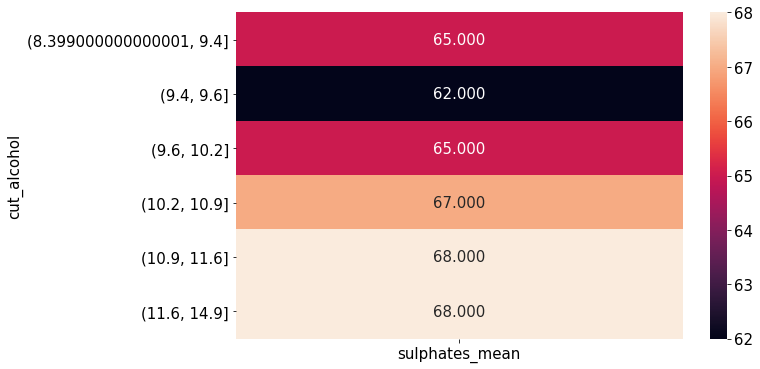

In [23]:
fig = plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = 15
sns.heatmap(table_pivot[['sulphates_mean']]*100,
           annot=True,fmt='.3f')
plt.show()

### Gráfico de correlación

In [24]:
base_wine_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'cut_alcohol'],
      dtype='object')

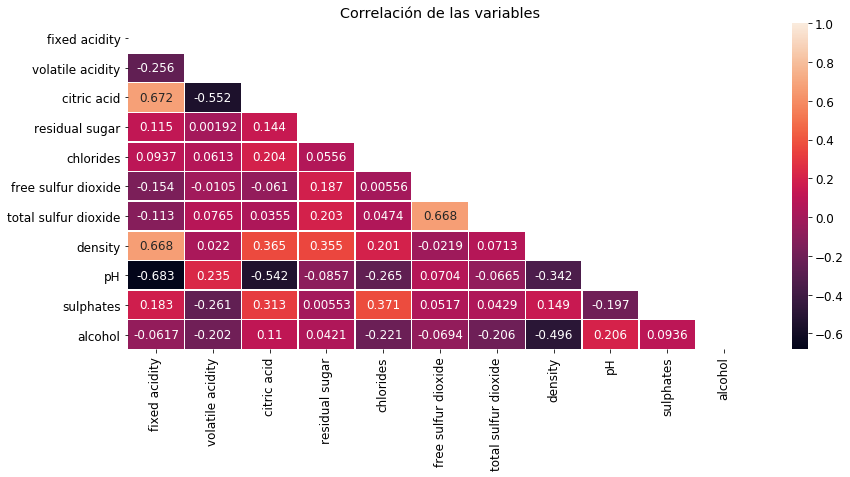

In [25]:
plt.rcParams['figure.figsize']=14,6
plt.rcParams['font.size'] = 12

with sns.axes_style("white"):
    temp=base_wine_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].corr()
    
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    
sns.heatmap(temp,mask=mask,annot=True,fmt='.3g', linewidths=.4)
plt.title("Correlación de las variables")
plt.show()